# CS 542 TPC-H Project

In [1]:
import sqlite3 #DBMS Used.
import time #For response times.
import psutil #For metrics.
import re #For parsing queries from sql source file.
import matplotlib.pyplot as plt #For graphing.

In [2]:
#Should work if tpch data base and sql source file are in the same folder as journal.
db_path='tpch.db'
sql_file_path='tpch queries sqlite.sql'

In [3]:
#Function to parse queries from sql source file using comments numbering the queries as delimiter.
#Done so that no adjustments to the file are necessary.
def read_queries(file_path):
    with open(file_path) as file:
        query=file.read()

    #Uses Query numbering comments as delimiter
    tpch_queries=re.split('-- Q\d+', query)[1:]
    return tpch_queries

In [4]:
#Function to run each tpch query and returns metrics.
#Designed to measure the metrics of specific the process generated by the query.
def run_tpch_query(query, conn, query_num):
    print(f"Executing Query {query_num}")

    #Process function for RAM.
    process=psutil.Process()

    #Cursor creation
    cursor=conn.cursor()

    #Metrics setup.
    memory_usage_start=process.memory_info().rss
    time_start=time.time()

    #Query executed.
    cursor.execute(query)
    rows=cursor.fetchall()

    #Metrics finish.
    time_end=time.time()
    memory_usage_end=process.memory_info().rss

    #Differences calculated.
    #Memory used converted into MB.
    memory_used=((memory_usage_start+memory_usage_end)/2)/(1024*1024)
    response_time=time_end-time_start

    #Counts rows processed
    rows_returned=len(rows)
    
    print(f"Query {query_num} response time: {response_time:.2f} seconds")
    print(f"Rows returned: {rows_returned}")
    print(f"Average memory used: {memory_used:.8f} MB")

    #Prints the first five queries to prove the optimized queries return the same results
    first_five = rows[:5]
    print(f"First five rows for query {query_num}:\n{first_five}\n")
    cursor.close()
    
    return response_time, rows_returned, memory_used

In [5]:
#Main function to utilize the rest of the functions.
def main(db_path, sql_file_path):

    #Creating 3 arrays to store metics.
    response_times, rows_processed, memory_usage=[], [], []

    #Connects to database.
    conn=sqlite3.connect(db_path)

    #Gets queries from sql source file.
    tpch_queries=read_queries(sql_file_path)

    #For loop to run queries and store metrics.
    for i, query in enumerate(tpch_queries, start=1):
        metrics=run_tpch_query(query, conn, i)
        response_times.append(metrics[0])
        rows_processed.append(metrics[1])
        memory_usage.append(metrics[2])
    
    conn.close()
    return response_times, rows_processed, memory_usage

In [6]:
#Uses main function.
metrics=main(db_path, sql_file_path)

Executing Query 1
Query 1 response time: 7.48 seconds
Rows returned: 4
Average memory used: 103.46679688 MB
First five rows for query 1:
[('A', 'F', 37734107, 56586554400.7299, 53758257134.86514, 55909065222.82561, 25.522005853257337, 38273.1297346216, 0.04998529583825443, 1478493), ('N', 'F', 991417, 1487504710.3799965, 1413082168.054104, 1469649223.1943603, 25.516471920522985, 38284.467760848216, 0.05009342667419324, 38854), ('N', 'O', 76631223, 114931741494.06375, 109186320121.31335, 113557617182.74557, 25.502087590269227, 38248.108587328614, 0.050000049918361766, 3004900), ('R', 'F', 37719753, 56568041380.90447, 53741292684.60378, 55889619119.82966, 25.50579361269077, 38250.85462610268, 0.050009405829983596, 1478870)]

Executing Query 2
Query 2 response time: 0.48 seconds
Rows returned: 460
Average memory used: 105.31640625 MB
First five rows for query 2:
[(9938.53, 'Supplier#000005359', 'UNITED KINGDOM', 185358, 'Manufacturer#4', 'QKuHYh,vZGiwu2FWEJoLDx04', '33-429-790-6131', 'uri

In [6]:
query_range=range(1, 23)

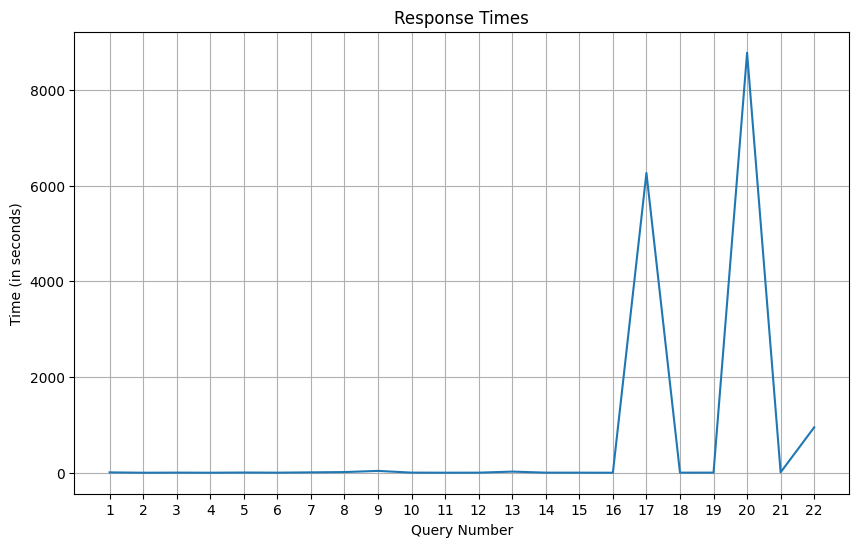

In [8]:
#Plot for Query Response Times.
plt.figure(figsize=(10, 6))
plt.plot(query_range, metrics[0])
plt.title('Response Times')
plt.xlabel('Query Number')
plt.ylabel('Time (in seconds)')
plt.xticks(query_range)
plt.grid(True)
plt.show()

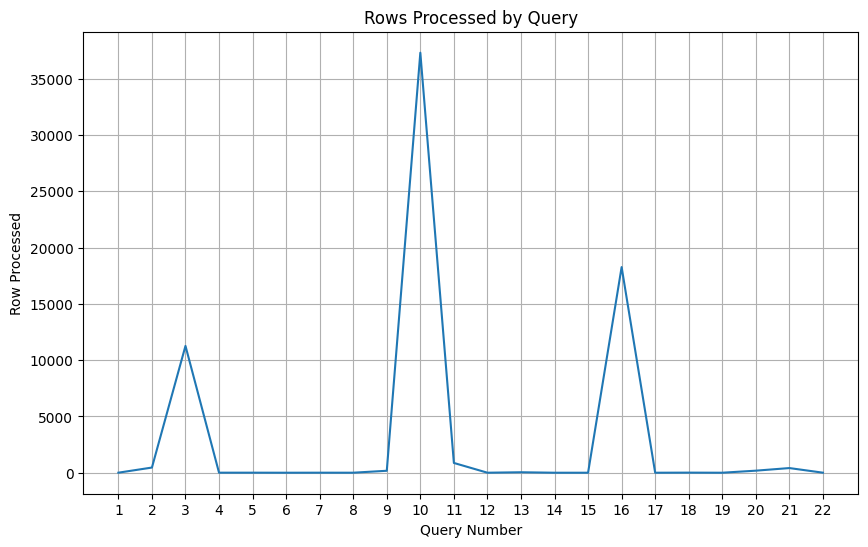

In [9]:
#Plot for Rows Processed.
plt.figure(figsize=(10, 6))
plt.plot(query_range, metrics[1])
plt.title('Rows Processed by Query')
plt.xlabel('Query Number')
plt.ylabel('Row Processed')
plt.xticks(query_range)
plt.grid(True)
plt.show()

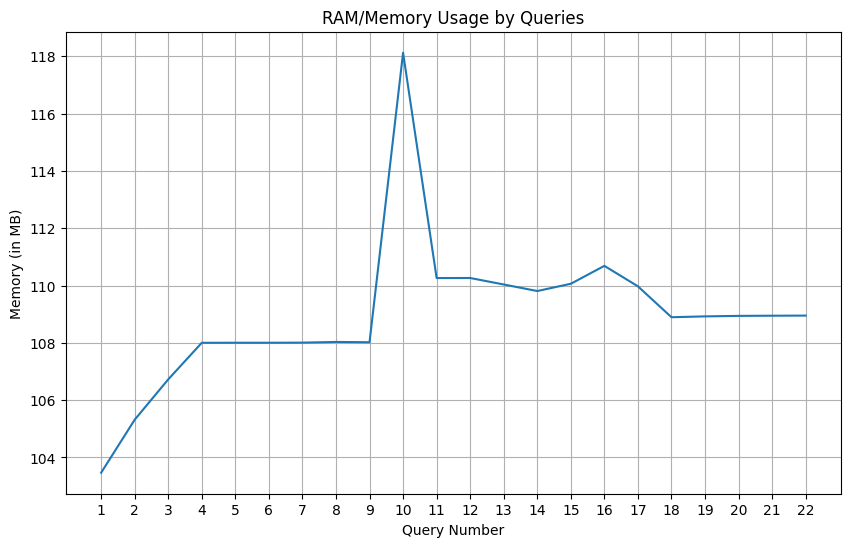

In [10]:
#Plot for Memory Usage.
plt.figure(figsize=(10, 6))
plt.plot(query_range, metrics[2])
plt.title('RAM/Memory Usage by Queries')
plt.xlabel('Query Number')
plt.ylabel('Memory (in MB)')
plt.xticks(query_range)
plt.grid(True)
plt.show()

In [11]:
#Converts response time for throughput calculation.
qph_values=[36000/time for time in metrics[0]]

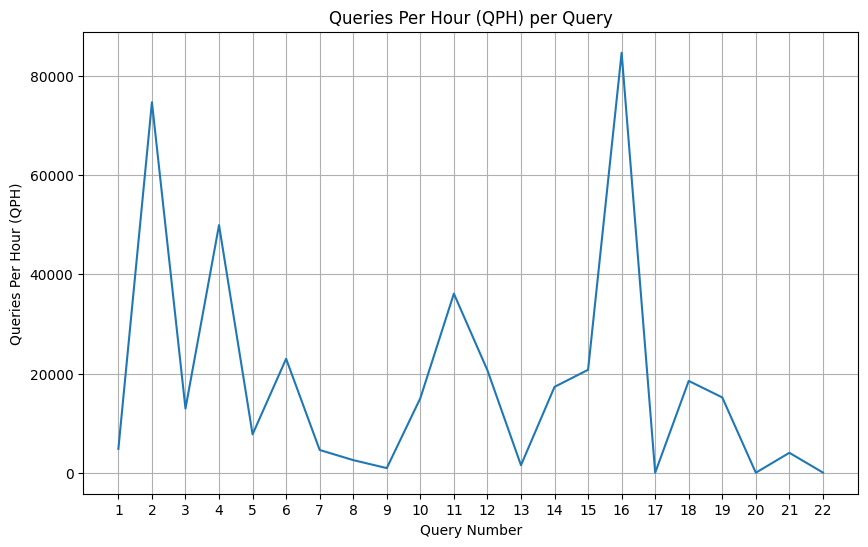

In [12]:
#Plot for throughput.
plt.figure(figsize=(10, 6))
plt.plot(query_range, qph_values)
plt.title('Queries Per Hour (QPH) per Query')
plt.xlabel('Query Number')
plt.ylabel('Queries Per Hour (QPH)')
plt.grid(True)
plt.xticks(query_range)
plt.show()

In [7]:
#Switches path to optimized queries.
new_file_path='optimized queries.sql'

In [8]:
#Re-runs main function with optimized queries.
new_metrics=main(db_path, new_file_path)

Executing Query 1
Query 1 response time: 7.52 seconds
Rows returned: 4
Average memory used: 103.43554688 MB
First five rows for query 1:
[('A', 'F', 37734107, 56586554400.7299, 53758257134.86514, 55909065222.82561, 25.522005853257337, 38273.1297346216, 0.04998529583825443, 1478493), ('N', 'F', 991417, 1487504710.3799965, 1413082168.054104, 1469649223.1943603, 25.516471920522985, 38284.467760848216, 0.05009342667419324, 38854), ('N', 'O', 76631223, 114931741494.06375, 109186320121.31335, 113557617182.74557, 25.502087590269227, 38248.108587328614, 0.050000049918361766, 3004900), ('R', 'F', 37719753, 56568041380.90447, 53741292684.60378, 55889619119.82966, 25.50579361269077, 38250.85462610268, 0.050009405829983596, 1478870)]

Executing Query 2
Query 2 response time: 0.47 seconds
Rows returned: 460
Average memory used: 105.26953125 MB
First five rows for query 2:
[(9938.53, 'Supplier#000005359', 'UNITED KINGDOM', 185358, 'Manufacturer#4', 'QKuHYh,vZGiwu2FWEJoLDx04', '33-429-790-6131', 'uri

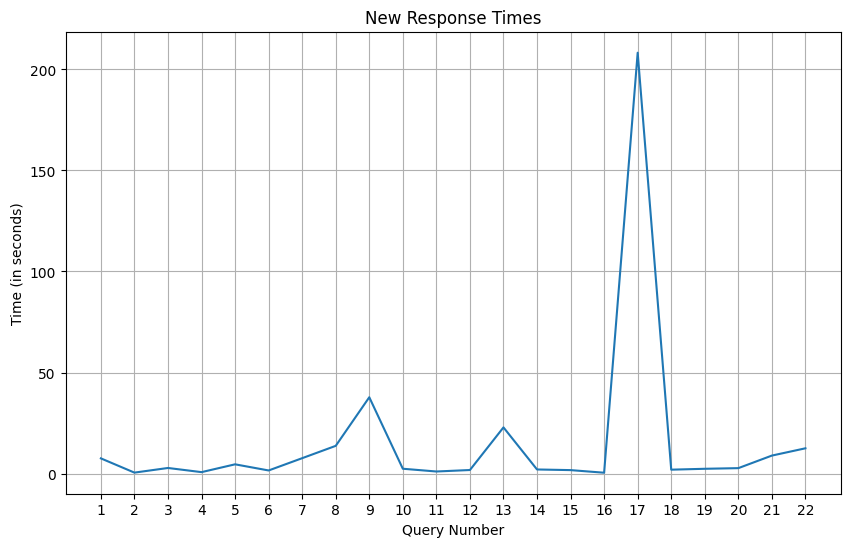

In [9]:
#Plot for New Query Response Times.
plt.figure(figsize=(10, 6))
plt.plot(query_range, new_metrics[0])
plt.title('New Response Times')
plt.xlabel('Query Number')
plt.ylabel('Time (in seconds)')
plt.xticks(query_range)
plt.grid(True)
plt.show()

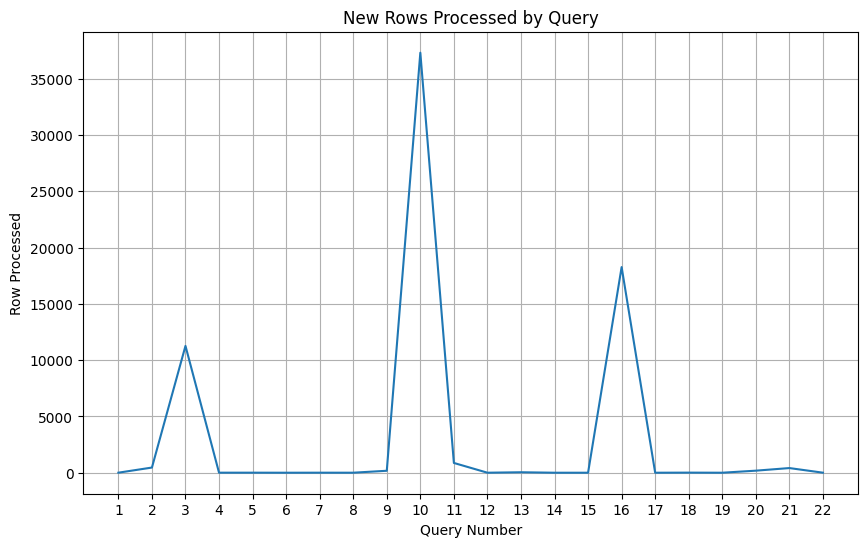

In [10]:
#Plot for Rows Processed.
#Will be the same as before to prove we are running the same queries.
plt.figure(figsize=(10, 6))
plt.plot(query_range, new_metrics[1])
plt.title('New Rows Processed by Query')
plt.xlabel('Query Number')
plt.ylabel('Row Processed')
plt.xticks(query_range)
plt.grid(True)
plt.show()

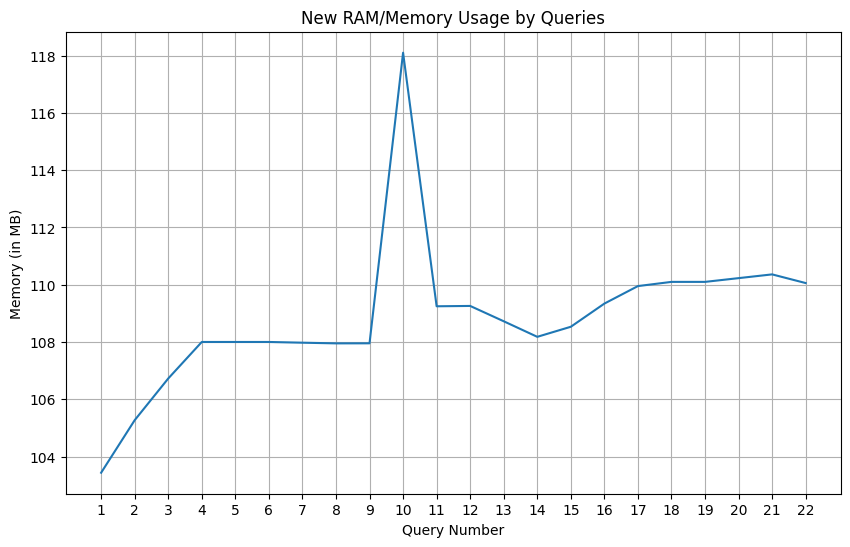

In [11]:
#Plot for Memory Usage.
plt.figure(figsize=(10, 6))
plt.plot(query_range, new_metrics[2])
plt.title('New RAM/Memory Usage by Queries')
plt.xlabel('Query Number')
plt.ylabel('Memory (in MB)')
plt.xticks(query_range)
plt.grid(True)
plt.show()

In [12]:
#Converts response time for throughput calculation.
new_qph_values=[36000/time for time in new_metrics[0]]

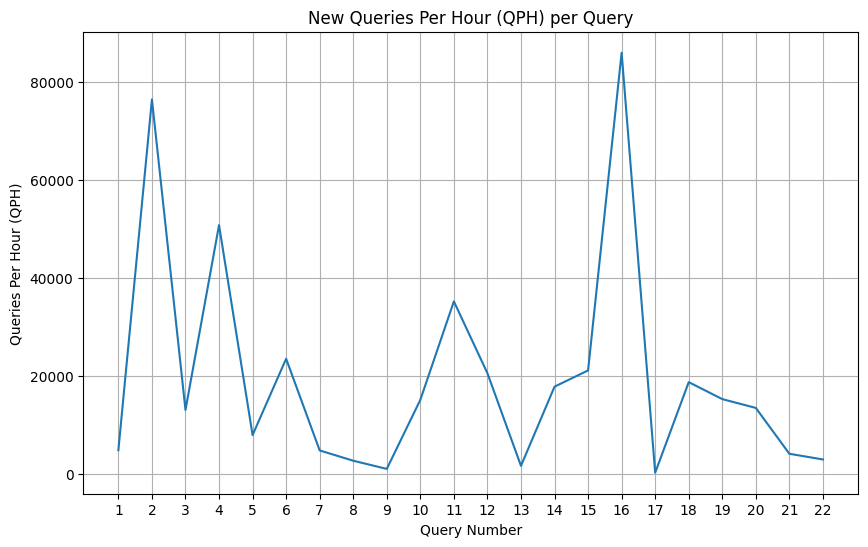

In [13]:
#Plot for new throughput.
plt.figure(figsize=(10, 6))
plt.plot(query_range, new_qph_values)
plt.title('New Queries Per Hour (QPH) per Query')
plt.xlabel('Query Number')
plt.ylabel('Queries Per Hour (QPH)')
plt.grid(True)
plt.xticks(query_range)
plt.show()